# Rubik's cube solver experiments

In [12]:
import os
import sys

from analysis import *
import matplotlib.pyplot as plt
import numpy as np

print("Setup completed successfully")

Setup completed successfully


## Test influence of number of moves to solution found

Failed to build the project
stdout: 
stderr: Error: cabal: There is no <pkgname>.cabal package file or cabal.project file.
To build packages locally you need at minimum a <pkgname>.cabal file. You can
use 'cabal init' to create one.

For non-trivial projects you will also want a cabal.project file in the root
directory of your project. This file lists the packages in your project and
all other build configuration. See the Cabal user guide for full details.


Test 1/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 20.0, duration: 0.062274932861328125
Test 2/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 20.0, duration: 0.052419185638427734
Test 3/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 20.0, duration: 0.06220364570617676
Test 4/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 20.0, duration: 0.07219243049621582
Test 5/100
Shuffle: 
Stderr: Final score: 120.0

solution: [], score: 20.0, duration: 0.11248636245727539
Test 

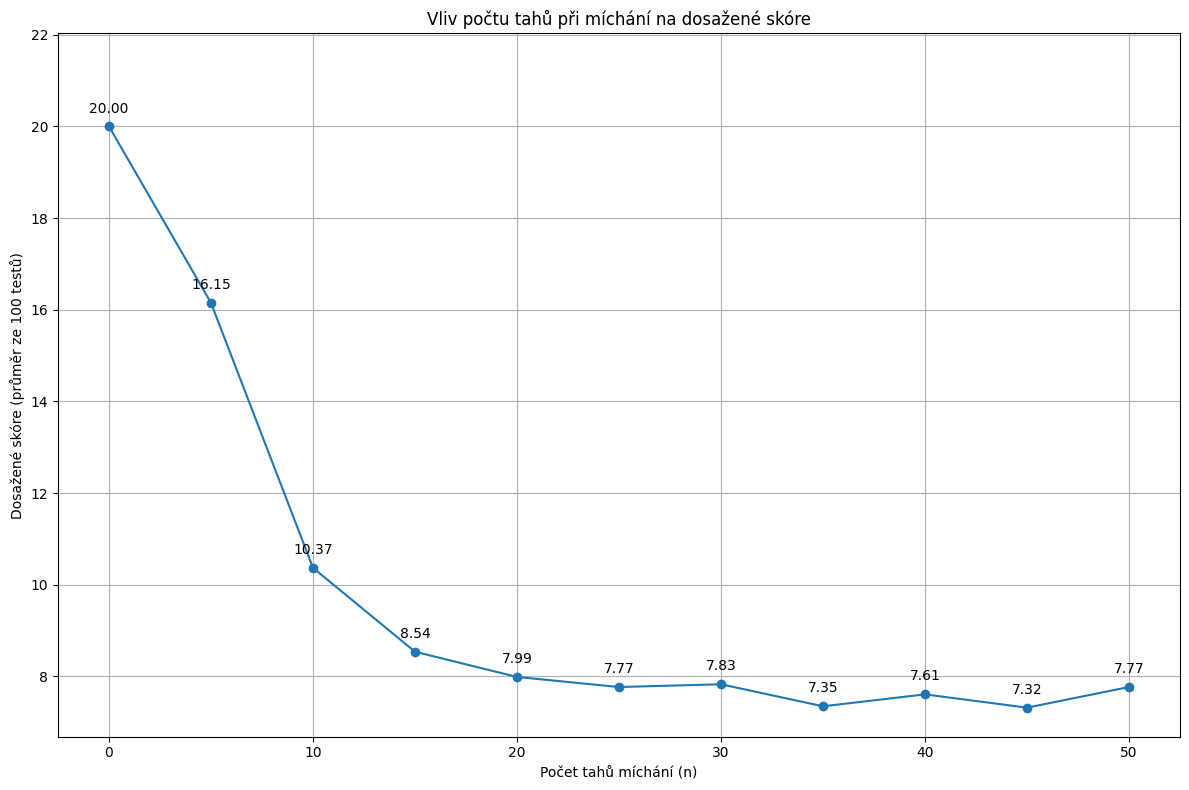

In [13]:
max_n = 50

n_values = range(0, max_n + 1, 5)
scores = []

for n in n_values:
    score, _, _, _, _, _ = test_solver(time_limit=100, search_depth=4, search_depth_g1=5, num_tests=100, num_moves=n)
    scores.append(score)

plt.figure(figsize=(12, 8)) 
plt.plot(n_values, scores, marker='o')

for i, score in enumerate(scores):
    plt.annotate(f'{score:.2f}', (n_values[i], score), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=10)

plt.title("Vliv počtu tahů při míchání na dosažené skóre")
plt.xlabel("Počet tahů míchání (n)")
plt.ylabel("Dosažené skóre (průměr ze 100 testů)")
plt.grid(True)

y_min, y_max = plt.ylim()
plt.ylim(y_min, y_max + (y_max - y_min) * 0.1)

plt.tight_layout()  
plt.savefig("scramble_moves_influence.png", dpi=300, bbox_inches="tight")
plt.show()

## Check for normality

Failed to build the project
stdout: 
stderr: Error: cabal: There is no <pkgname>.cabal package file or cabal.project file.
To build packages locally you need at minimum a <pkgname>.cabal file. You can
use 'cabal init' to create one.

For non-trivial projects you will also want a cabal.project file in the root
directory of your project. This file lists the packages in your project and
all other build configuration. See the Cabal user guide for full details.


Test 1/100
Shuffle: LP RP DP BP R F UP FP RP DP U D R F BP
Stderr: Final score: 8.0

solution: ['FP', 'B2', 'D', 'L', 'UP', 'R', 'U'], score: 8.0, duration: 0.11215353012084961
Test 2/100
Shuffle: R U LP B D B R U DP LP DP RP B DP B
Stderr: Final score: 9.0

solution: ['L', 'UP', 'L', 'B2', 'R2', 'B2'], score: 9.0, duration: 0.11244344711303711
Test 3/100
Shuffle: BP D RP F B R FP U BP UP D LP D FP R
Stderr: Final score: 6.0

solution: ['B', 'D', 'L', 'U2'], score: 6.0, duration: 0.11233997344970703
Test 4/100
Shuffle: D BP U FP UP

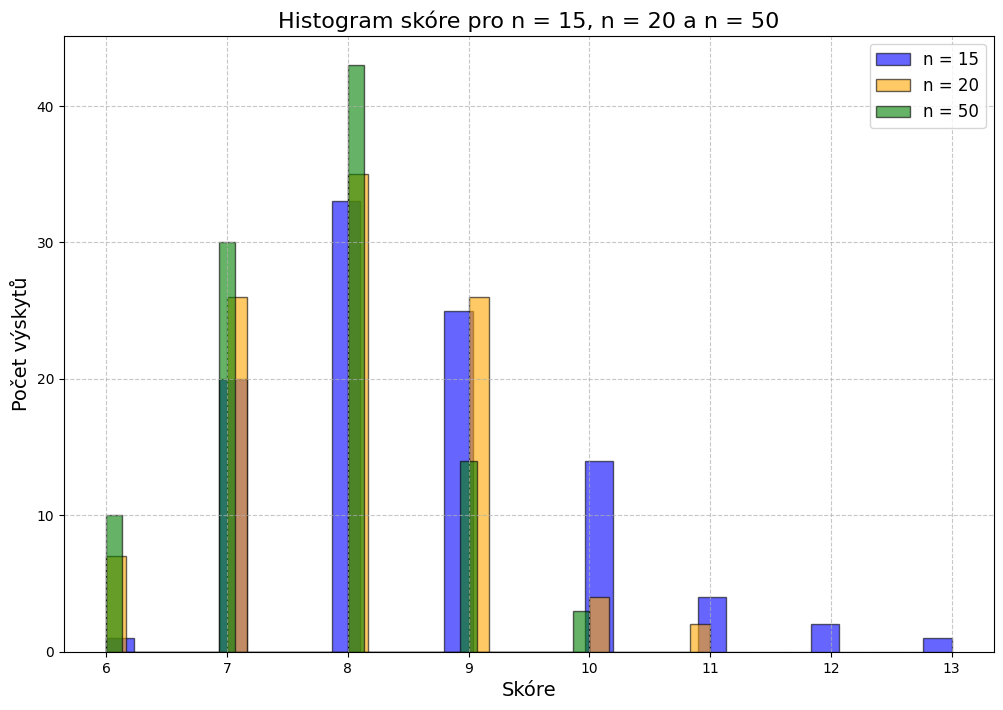

Shapiro-Wilk test for normality:
Scores1: W=0.9087897493211431, p-value=3.752069026434431e-06
Scores2: W=0.9168830593338708, p-value=9.654475054992593e-06
Scores3: W=0.8968411708444551, p-value=1.007315382472891e-06


In [14]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

time_limit = 100
search_depth = 4
search_depth_g1 = 5
num_tests = 100
n1 = 15
n2 = 20
n3 = 50

score1, _, _, scores1, _, _ = test_solver(time_limit=time_limit, search_depth=search_depth, search_depth_g1=search_depth_g1, num_tests=num_tests, num_moves=n1)
score2, _, _, scores2, _, _ = test_solver(time_limit=time_limit, search_depth=search_depth, search_depth_g1=search_depth_g1, num_tests=num_tests, num_moves=n2)
score3, _, _, scores3, _, _ = test_solver(time_limit=time_limit, search_depth=search_depth, search_depth_g1=search_depth_g1, num_tests=num_tests, num_moves=n3)

plt.figure(figsize=(12, 8))

plt.hist(scores1, bins=30, alpha=0.6, label=f'n = {n1}', color='blue', edgecolor='black')
plt.hist(scores2, bins=30, alpha=0.6, label=f'n = {n2}', color='orange', edgecolor='black')
plt.hist(scores3, bins=30, alpha=0.6, label=f'n = {n3}', color='green', edgecolor='black')

plt.title(f"Histogram skóre pro n = {n1}, n = {n2} a n = {n3}", fontsize=16)
plt.xlabel("Skóre", fontsize=14)
plt.ylabel("Počet výskytů", fontsize=14)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(loc='upper right', fontsize=12)
plt.savefig("histogram_scores.png", dpi=300, bbox_inches="tight")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test1 = stats.shapiro(scores1)
shapiro_test2 = stats.shapiro(scores2)
shapiro_test3 = stats.shapiro(scores3)

print(f"Shapiro-Wilk test for normality:")
print(f"Scores1: W={shapiro_test1[0]}, p-value={shapiro_test1[1]}")
print(f"Scores2: W={shapiro_test2[0]}, p-value={shapiro_test2[1]}")
print(f"Scores3: W={shapiro_test3[0]}, p-value={shapiro_test3[1]}")
 

## Perform KS test

Kolmogorov-Smirnov test:


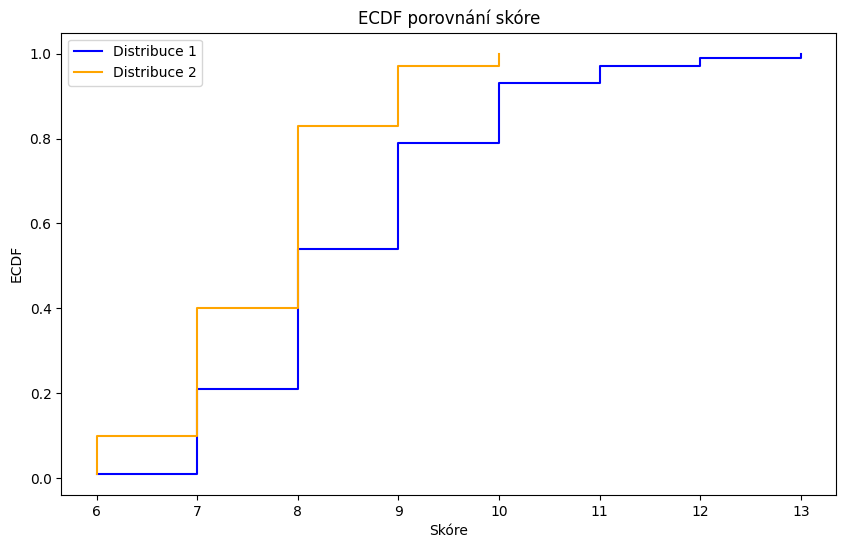

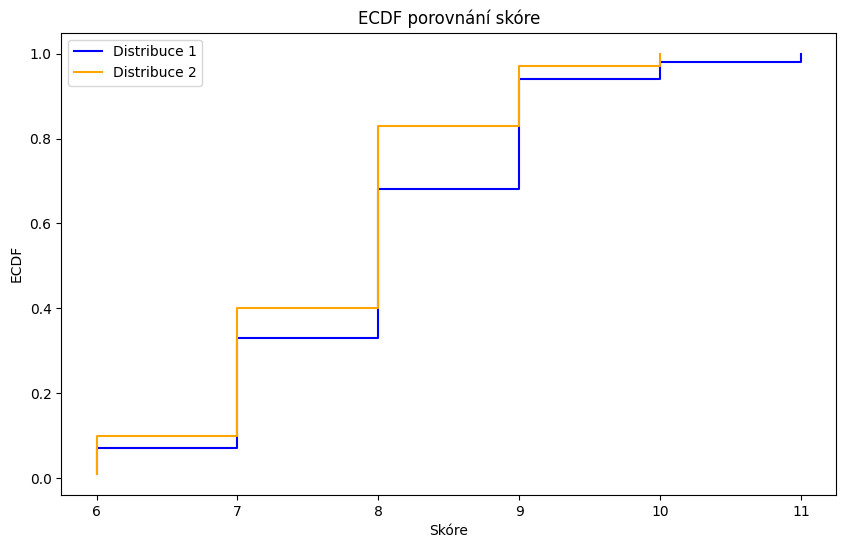

In [15]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

def calculate_ks_statistic(scores1, scores2, plot_name):
    ks_statistic, p_value = stats.ks_2samp(scores1, scores2, mode='exact')
    # Generate ECDFs for both datasets
    x1, y1 = ecdf(scores1)
    x2, y2 = ecdf(scores2)
    print(f"KS statistic: {ks_statistic}, p-value: {p_value}")

    # Plot ECDFs
    plt.figure(figsize=(10, 6))
    plt.step(x1, y1, where='post', label='Distribuce 1', color='blue')
    plt.step(x2, y2, where='post', label='Distribuce 2', color='orange')
    plt.title(f"ECDF porovnání skóre")
    plt.xlabel('Skóre')
    plt.ylabel('ECDF')
    plt.legend(loc='best')
    plt.savefig(plot_name, dpi=300, bbox_inches="tight")
    plt.show()


print(f"Kolmogorov-Smirnov test:")
calculate_ks_statistic(scores1, scores3, "ks_test_15_50.png")
calculate_ks_statistic(scores2, scores3, "ks_test_20_50.png")
